In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, SCORERS
# r2 - среднеквадратичная ошибка (MSE), нормированная на отрезок [0, 1] 
# и обращенная так, чтобы ее наилучшим значением была единица.

1 Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.


2 Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. 
Если вы используете Pandas, то подойдет следующий код: data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [2]:
abalone_df = pd.read_csv('abalone.csv')
abalone_df['Sex'] = abalone_df['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
abalone_df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


3 Разделите содержимое файлов на признаки и целевую переменную. 

В последнем столбце записана целевая переменная, в остальных — признаки.

In [3]:
X = abalone_df.drop(['Rings'], axis =1)
y = abalone_df['Rings']

4 Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: 
от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). 

Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. 

Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold.  В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

In [4]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [5]:
clf = RandomForestRegressor(random_state=1)

grid = {'n_estimators': np.arange(1, 50)}
cv = KFold(n_splits=5, shuffle=True, random_state=1)

gs = GridSearchCV(clf, grid, scoring='r2', cv=cv, n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='r2')

5 Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. 

Это количество и будет ответом на задание.

In [6]:
score_results = gs.cv_results_['mean_test_score']
index = np.where(score_results > 0.525)[0][0]
print('n_estimators: ', gs.cv_results_['param_n_estimators'][index])

n_estimators:  28


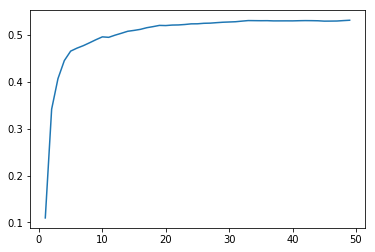

In [7]:
plt.plot( gs.cv_results_['param_n_estimators'].data, gs.cv_results_['mean_test_score'])
plt.show()